In [10]:
%pip install xgboost
%pip install joblib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import joblib 

READING CSV FILE

In [6]:
# Load the dataset
df_r = pd.read_csv('final_data.csv')
df_u=pd.read_csv('undersample_concantenated_df.csv')
# Assuming 'frequency' is the feature column and 'quality' is the target column
X = df_r['Frequency']
y = df_r['Quality']
X = X.values.reshape(-1, 1)
print(df_r.head())

   Frequency Quality
0        245     low
1        167    high
2        173    high
3        177    high
4        169    high


CONVERTING CATEGORICAL VALUES TO NUMERICAL VALUES FOR TARGET CLASS 'Quality

In [4]:
# Encode the target variable (convert 'low', 'medium', 'high' to numerical values)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DEFINING CLASSIFIERS

In [5]:
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'ANN': MLPClassifier( hidden_layer_sizes=(300,200,150,100),
        max_iter=50,
        random_state=42,
        activation='tanh', 
        solver='adam', # Experiment with different activation functions
        learning_rate='adaptive',  # Adaptive learning rate
        alpha=0.0001,  # Regularization parameter
        batch_size=64,  # Experiment with different batch sizes
        early_stopping=True,  # Enable early stopping
        n_iter_no_change=10) # Number of epochs with no improvement to wait for before stopping)
}

CLASSIFICATION REPORTS OF VARIOUS CLASSFIERS

In [12]:
accuracy_scores = {}
trained_models = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

    report = classification_report(y_test, y_pred,zero_division=1)

    print(f"\n{name} Classifier:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)
    trained_models[name] = clf


Random Forest Classifier:
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.86        34
           1       1.00      1.00      1.00        27
           2       0.81      0.94      0.87        32

    accuracy                           0.90        93
   macro avg       0.91      0.91      0.91        93
weighted avg       0.91      0.90      0.90        93


Logistic Regression Classifier:
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        34
           1       1.00      1.00      1.00        27
           2       0.87      0.84      0.86        32

    accuracy                           0.90        93
   macro avg       0.91      0.91      0.91        93
weighted avg       0.90      0.90      0.90        93


SVM Classifier:
Accuracy: 0.92
Classification Report:
               precision    recall  f1-score 

CLASSIFIERS X ACCURACY GRAPH

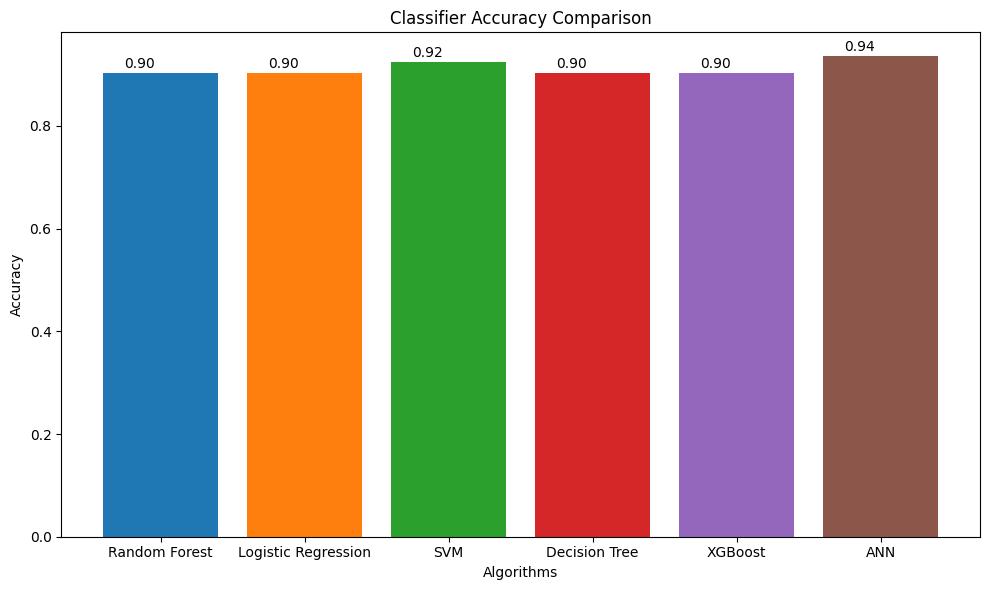

In [7]:
# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
colors = list(plt.cm.tab10(np.arange(len(accuracy_scores))))
bars=plt.bar(accuracy_scores.keys(), accuracy_scores.values(),color=colors)
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')    
plt.title('Classifier Accuracy Comparison')
for bar, accuracy in zip(bars, accuracy_scores.values()):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, f'{accuracy:.2f}', ha='center')
plt.tight_layout()
plt.show()

In [14]:
# Save the MLPClassifier model
mlp_model = trained_models['ANN']
joblib.dump(mlp_model, 'mlp_model.joblib')

['mlp_model.joblib']

In [15]:
model = joblib.load('mlp_model.joblib')
new_data = [[170],[190],[200],[140],[270],[290]]  # Your new input data
predicted_classes = model.predict(new_data)
print("Predicted classes:", predicted_classes)

Predicted classes: [0 2 2 0 1 1]
